In [1]:
import numpy as np
import matplotlib.pyplot as plt


timespan = 361 # days
sampling_interval = 1/(24*4) # d^-1 , every 15 minutes 
N = int(timespan//sampling_interval+1)

t_ = np.linspace(0,timespan,N)

In [2]:
d0 = 0.42
d1 = 0.73
sigma_0 = 0.005
sigma_j = 0.001
sigma_e = 0.005
alpha = 0.9999

# Simulate bias

[[ 9999     0     0     0     0]
 [    0  9999     0     0     0]
 [    0     0  9999     0     0]
 [   50    10     0 10000     0]
 [   50     0    10     0 10000]]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]]


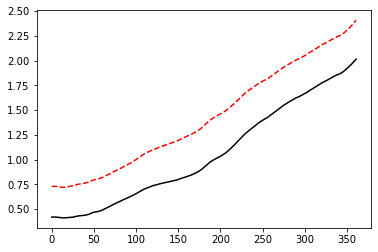

In [3]:
z = np.array([0,0,0,d0,d1])
Z = z[:,None]

A = np.vstack([alpha*np.eye(3,5),
               np.array([[sigma_0,sigma_j,0,1,0],
                         [sigma_0,0,sigma_j,0,1]])])
B = np.vstack([(1-alpha)*np.diag([1,1,1]),
               np.zeros([2,3])])

print(np.round(A*10000).astype(int))
print(np.round(B*10000).astype(int))

np.random.seed(7)
W = np.random.randn(N,3) 
for k in range(N-1): 
    z = (np.matmul(A,z.T)-np.matmul(B,W[k,:].T) ).T
    Z = np.hstack([Z,z[:,None]])
    pass
offset = Z[3:,:]

plt.plot(t_ ,offset[0,:],'k-') 
plt.plot(t_ ,offset[1,:],'r--') 

# Simulate noise

In [4]:
noise = np.random.randn(2,N)*sigma_e

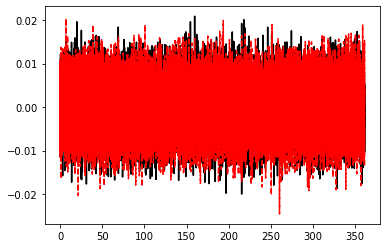

In [5]:
plt.plot(t_ ,noise[0,:],'k-') 
plt.plot(t_ ,noise[1,:],'r--') ;

# Combine

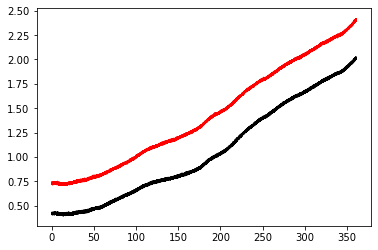

In [6]:
measurement_error = offset + noise

plt.plot(t_ ,measurement_error[0,:],'k-') 
plt.plot(t_ ,measurement_error[1,:],'r--') ;

# Save results

In [7]:
import pickle
filename = './result/result_step1_measurement_error.pckl'
outfile = open(filename,'wb')
pickle.dump([t_,measurement_error[:2,:],offset[:2,:],noise[:2,:]],outfile)
outfile.close()